In [1]:
# Import required Python packages.

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

In [2]:
travel=pd.read_csv('datasets/Sept11Travel.csv')

In [3]:
travel.head()

,Month,Air RPM (000s),Rail PM,VMT (billions)
0,1/1/90,35153577,454115779,163.28
1,2/1/90,32965187,435086002,153.25
2,3/1/90,39993913,568289732,178.42
3,4/1/90,37981886,568101697,178.68
4,5/1/90,38419672,539628385,188.88


In [4]:
travel.columns = ['month', 'air_rpm', 'rail_pm', 'vmt']

In [5]:
travel.head()

,month,air_rpm,rail_pm,vmt
0,1/1/90,35153577,454115779,163.28
1,2/1/90,32965187,435086002,153.25
2,3/1/90,39993913,568289732,178.42
3,4/1/90,37981886,568101697,178.68
4,5/1/90,38419672,539628385,188.88


In [6]:
print(travel['air_rpm'].mean(), travel['air_rpm'].std())

49257805.680232555 8603754.860667676


In [7]:
print(travel['rail_pm'].mean(), travel['rail_pm'].std())

482755766.24418604 68550402.9503057


In [8]:
print(travel['vmt'].mean(), travel['vmt'].std())

210.25058139534886 24.95440571466857


In [9]:
travel['month_num'] = 0

for i in range(len(travel)):
    travel['month_num'][i] = i + 1
    i = i + 1

<ipython-input-9-09e75624c010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel['month_num'][i] = i + 1


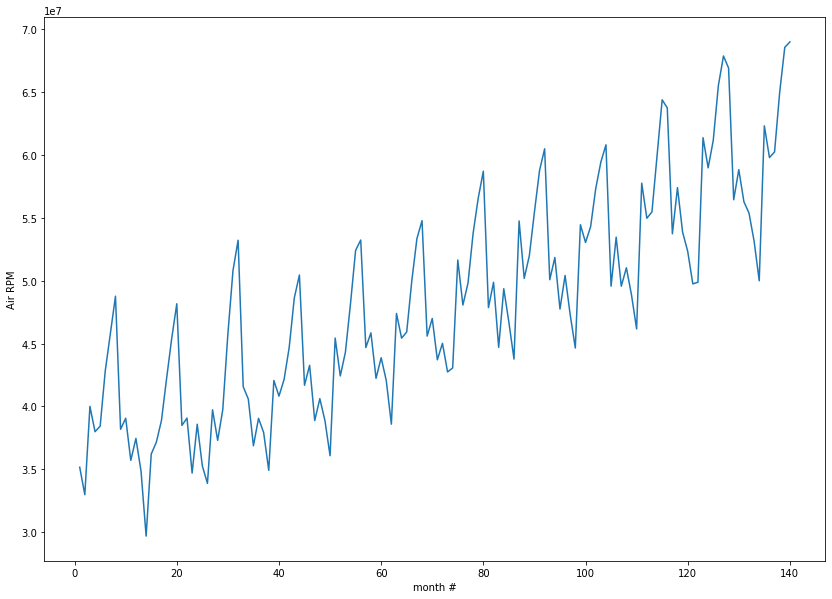

In [10]:
plt.figure(figsize=(14,10))
plt.xlabel('month #')
plt.ylabel('Air RPM')
plt.plot(travel['month_num'][:140], travel['air_rpm'][:140])

In [11]:
# Seasonality

month_dict = {0: 'Jan', 1: 'Feb', 2: 'Mar', 3: 'Apr', 4: 'May', 5: 'Jun', 6: 'Jul'
              , 7: 'Aug', 8: 'Sep', 9: 'Oct', 10: 'Nov', 11: 'Dec'}

travel['month_name'] = ''
for i in range(len(travel['month'])):
    travel['month_name'][i] = month_dict[(i % 12)]

<ipython-input-11-4e6c79ea2b70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel['month_name'][i] = month_dict[(i % 12)]


In [12]:
X = travel[['month_num', 'month_name']][:140]
y = travel[['air_rpm']][:140]

In [13]:
X = pd.get_dummies(X)
X = X.drop('month_name_Jan', axis=1)
X.columns

Index(['month_num', 'month_name_Apr', 'month_name_Aug', 'month_name_Dec',
       'month_name_Feb', 'month_name_Jul', 'month_name_Jun', 'month_name_Mar',
       'month_name_May', 'month_name_Nov', 'month_name_Oct', 'month_name_Sep'],
      dtype='object')

In [14]:
X.head()

,month_num,month_name_Apr,month_name_Aug,month_name_Dec,month_name_Feb,month_name_Jul,month_name_Jun,month_name_Mar,month_name_May,month_name_Nov,month_name_Oct,month_name_Sep
0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,1,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,1,0,0,0


In [15]:
# sklearn linear regression

travel_lm = LinearRegression()
travel_lm.fit(X, y)

LinearRegression()

In [16]:
print('Intercept: ', travel_lm.intercept_)

Intercept:  [31147495.94110374]


In [17]:
for i in range(len(X.columns)):
    print(X.columns[i], 'Coefficient: ', travel_lm.coef_[0][i])

month_num Coefficient:  172609.74466014307
month_name_Apr Coefficient:  3946883.6826862395
month_name_Aug Coefficient:  13438949.287379008
month_name_Dec Coefficient:  2158226.8979114136
month_name_Feb Coefficient:  -2589415.6613268023
month_name_Jul Coefficient:  12250808.198705819
month_name_Jun Coefficient:  8976015.943365958
month_name_Mar Coefficient:  6369322.177346383
month_name_May Coefficient:  5125311.438026098
month_name_Nov Coefficient:  615819.6425715423
month_name_Oct Coefficient:  4607931.387231707
month_name_Sep Coefficient:  3109294.040982741


In [18]:
travel_pre_pred = travel_lm.predict(X)
print(r2_score(y, travel_pre_pred))
print(AIC_score(travel_pre_pred, y, travel_lm))

0.972186211358796
4374.59629735441


In [19]:
X_post = travel[['month_num', 'month_name']][140:]
y_post = travel[['air_rpm']][140:]

X_post = pd.get_dummies(X_post)
X_post = X_post.drop('month_name_Jan', axis=1)

In [20]:
travel_post_pred = travel_lm.predict(X_post)
print(r2_score(y_post, travel_post_pred))
print(AIC_score(travel_post_pred, y_post, travel_lm))

-1.0059056722633417
1122.7167515809313


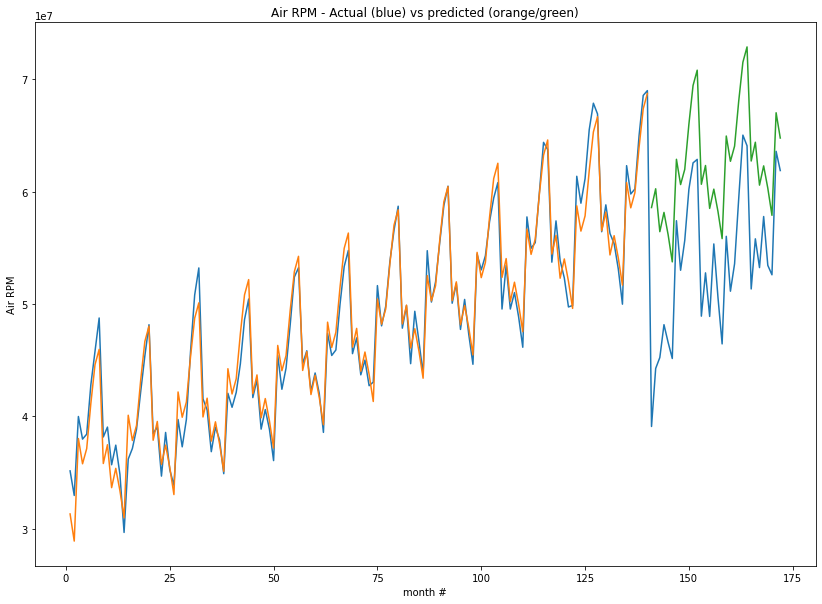

In [21]:
plt.figure(figsize=(14,10))
plt.title('Air RPM - Actual (blue) vs predicted (orange/green)')
plt.xlabel('month #')
plt.ylabel('Air RPM')
plt.plot(travel['month_num'], travel['air_rpm'])
plt.plot(X['month_num'], travel_pre_pred)
plt.plot(X_post['month_num'], travel_post_pred)

In [25]:
import statsmodels.api as sm
travel_full = sm.OLS(y, X.assign(const=1))
results = travel_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                air_rpm   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     369.9
Date:                Thu, 22 Jul 2021   Prob (F-statistic):           1.53e-92
Time:                        17:00:50   Log-Likelihood:                -2184.3
No. Observations:                 140   AIC:                             4395.
Df Residuals:                     127   BIC:                             4433.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
month_num       1.726e+05   3175.301     54.

In [26]:
X['resid'] = 0
for i in range(len(X)):
    X['resid'][i] = y['air_rpm'][i] - int(travel_pre_pred[i])

<ipython-input-26-eab21de319ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['resid'][i] = y['air_rpm'][i] - int(travel_pre_pred[i])


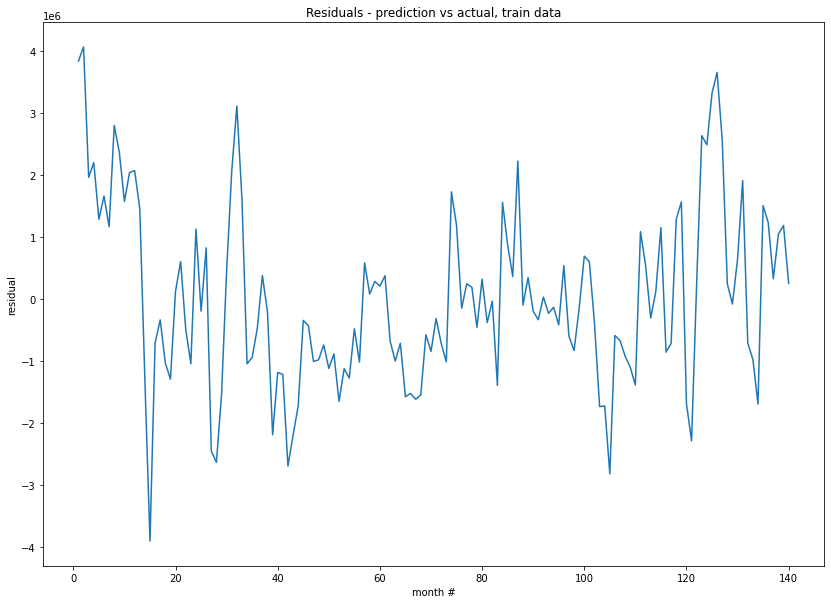

In [27]:
plt.figure(figsize=(14,10))
plt.title('Residuals - prediction vs actual, train data')
plt.xlabel('month #')
plt.ylabel('residual')
plt.plot(X['month_num'], X['resid'])

In [28]:
X_post['resid'] = 0
for i in range(len(X_post)):
    X_post['resid'][i+140] = y_post['air_rpm'][i+140] - int(travel_post_pred[i])

<ipython-input-28-2ee91cc54b37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_post['resid'][i+140] = y_post['air_rpm'][i+140] - int(travel_post_pred[i])


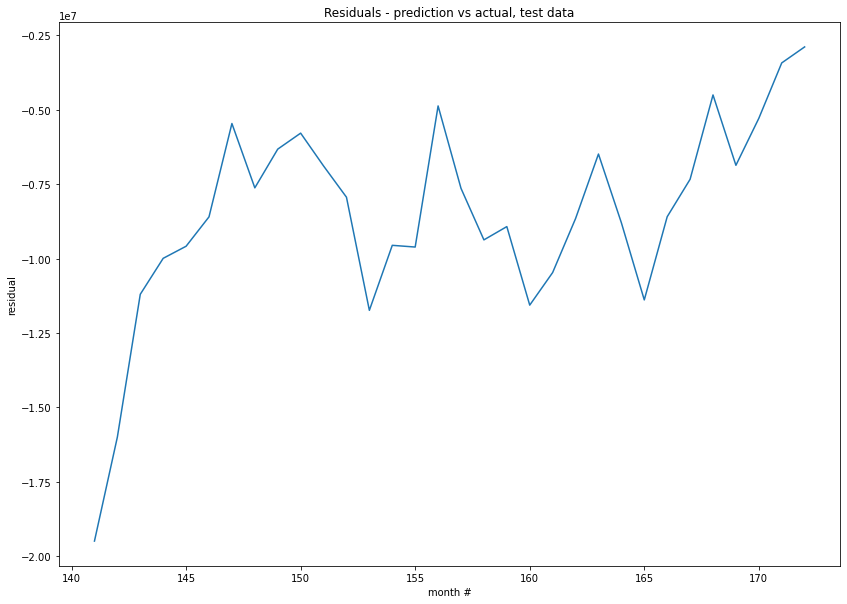

In [29]:
plt.figure(figsize=(14,10))
plt.title('Residuals - prediction vs actual, test data')
plt.xlabel('month #')
plt.ylabel('residual')
plt.plot(X_post['month_num'], X_post['resid'])

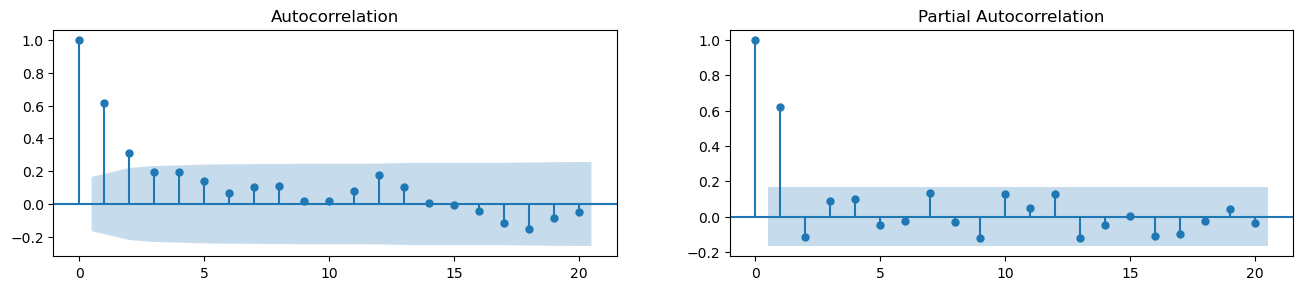

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 3), dpi=100)
plot_acf(X['resid'].tolist(), lags=20, ax=axes[0])
plot_pacf(X['resid'].tolist(), lags=20, ax=axes[1])
plt.show()

# AR(1) model - error of a given time period is related to error of the previous time period